<a href="https://colab.research.google.com/github/Naditya206/Machine-Learning/blob/main/JS04_SOAL_KUIS1_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pengantar

Pada Kuis 1 ini Anda diminta untuk melakukan proses explorartory data analysis (EDA) dan pra pengolahan data pada dataset "Census Income". Dataset ini merupakan data tabular yang memiliki beberapa nilai yang hilang (missing value) dan nama variabel (fitur) yang perlu disesuaikan.

Untuk membantu Anda, notebook ini akan memberikan kode awal untuk proses download data, load data, dan inspeksi informasi terkait dengan metadata.

# Load Data and Inspect Metadata

In [1]:
# Install UCI REPO Library
!pip install -q ucimlrepo

In [2]:
# Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ucimlrepo import fetch_ucirepo

In [3]:
# fetch data
adult_income = fetch_ucirepo(id=2)

In [4]:
# Data
X = adult_income.data.features
y = adult_income.data.targets

# Concate Features and Target
df = pd.concat([X, y], axis=1)

# Show Top 5
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [16]:
# Data Size
df.shape

(48842, 15)

In [6]:
# Inspect metadata
adult_income.metadata

{'uci_id': 2,
 'name': 'Adult',
 'repository_url': 'https://archive.ics.uci.edu/dataset/2/adult',
 'data_url': 'https://archive.ics.uci.edu/static/public/2/data.csv',
 'abstract': 'Predict whether annual income of an individual exceeds $50K/yr based on census data. Also known as "Census Income" dataset. ',
 'area': 'Social Science',
 'tasks': ['Classification'],
 'characteristics': ['Multivariate'],
 'num_instances': 48842,
 'num_features': 14,
 'feature_types': ['Categorical', 'Integer'],
 'demographics': ['Age', 'Income', 'Education Level', 'Other', 'Race', 'Sex'],
 'target_col': ['income'],
 'index_col': None,
 'has_missing_values': 'yes',
 'missing_values_symbol': 'NaN',
 'year_of_dataset_creation': 1996,
 'last_updated': 'Tue Sep 24 2024',
 'dataset_doi': '10.24432/C5XW20',
 'creators': ['Barry Becker', 'Ronny Kohavi'],
 'intro_paper': None,
 'additional_info': {'summary': "Extraction was done by Barry Becker from the 1994 Census database.  A set of reasonably clean records was ex

# Bagian 1 - Data Loading dan Data Imputation

## Soal 1 (5 poin)
1.   Lakukan inspeksi profile data
2.   **Variabel apa** yang memiliki **nilai yang hilang** (missing value) dan **berapa** jumlahnya?



In [21]:
# Jawab Soal 1
# Kerjakan pada cell ini
# Anda diperbolehkan menambah cell jika diperlukan

# Pengecekan Dimensi Data
print("Dimensi Data:")
print(df.shape)

# Pengecekan Tipe Data
print("\nTipe Data:")
print(df.dtypes)



Dimensi Data:
(48842, 15)

Tipe Data:
age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
income            object
dtype: object


In [22]:
import pandas as pd
import numpy as np

# Mengganti nilai '?' dengan nilai NaN (Not a Number)
df_cleaned = df.replace('?', np.nan)

# Hitung jumlah nilai hilang di setiap kolom
missing_values_count = df_cleaned.isnull().sum()

# Filter dan tampilkan hanya kolom yang memiliki nilai hilang
variables_with_missing_data = missing_values_count[missing_values_count > 0]

print("Variabel dengan Nilai Hilang dan Jumlahnya:")
print(variables_with_missing_data)

Variabel dengan Nilai Hilang dan Jumlahnya:
workclass         2799
occupation        2809
native-country     857
dtype: int64


## Soal 2 (5 poin)
1. Lakukan proses data imputation pada fitur yang memiliki data yang hilang
2. Cek kembali apakah masih terdapat data yang hilang

In [23]:
# Jawab Soal 2
# Kerjakan pada cell ini
# Anda diperbolehkan menambah cell jika diperlukan

#1. Imputasi Mode (Untuk Fitur Kategorikal)
categorical_features = ['workclass', 'occupation', 'native-country']

for feature in categorical_features:
    # Hitung modus dari fitur tersebut
    mode_value = df[feature].mode()[0]

    # Isi nilai yang hilang dengan modus
    df[feature].fillna(mode_value, inplace=True)

print("Imputasi mode untuk fitur kategorikal selesai.")

Imputasi mode untuk fitur kategorikal selesai.


/tmp/ipython-input-2631784797.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[feature].fillna(mode_value, inplace=True)


In [24]:
#2. Imputasi Median (Untuk Fitur Numerik)
numerical_features = ['age', 'capital-gain', 'capital-loss']

for feature in numerical_features:
    # Hitung median dari fitur tersebut
    median_value = df[feature].median()

    # Isi nilai yang hilang dengan median
    df[feature].fillna(median_value, inplace=True)

print("Imputasi median untuk fitur numerik selesai.")

Imputasi median untuk fitur numerik selesai.


/tmp/ipython-input-3229018476.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[feature].fillna(median_value, inplace=True)


In [25]:
#Cek kembali apakah masih terdapat data yang hilang
df.isnull().sum()

,0
age,0
workclass,0
fnlwgt,0
education,0
education-num,0
marital-status,0
occupation,0
relationship,0
race,0
sex,0


## Soal 3 (10 poin)
Inspeksi semua fitur kualitatif. Jika terdapat value yang **tidak sesuai**, **ganti dengan 'Others'** atau yang sesuai atau jika terdapat duplikasi karena **kesalahan penulisan**, lakukan penyesuaian.

In [27]:
# Jawab Soal 3
# Kerjakan pada cell ini
# Anda diperbolehkan menambah cell jika diperlukan

import pandas as pd
import numpy as np

# Periksa fitur workclass
print("Nilai unik pada workclass sebelum penyesuaian:")
print(df['workclass'].value_counts())

# Ganti 'Without-pay' dan 'Never-worked' menjadi 'Others'
df['workclass'] = df['workclass'].replace(['Without-pay', 'Never-worked'], 'Others')

print("\nNilai unik pada workclass setelah penyesuaian:")
print(df['workclass'].value_counts())

# Periksa fitur marital-status
print("\nNilai unik pada marital-status sebelum penyesuaian:")
print(df['marital-status'].value_counts())

# Gabungkan 'Married-spouse-absent', 'Married-AF-spouse', dan 'Married-civ-spouse' menjadi 'Married'
df['marital-status'] = df['marital-status'].replace([
    'Married-spouse-absent',
    'Married-AF-spouse'
], 'Married')
df['marital-status'] = df['marital-status'].replace(['Married-civ-spouse'], 'Married')

print("\nNilai unik pada marital-status setelah penyesuaian:")
print(df['marital-status'].value_counts())

Nilai unik pada workclass sebelum penyesuaian:
workclass
Private             36705
Self-emp-not-inc     3862
Local-gov            3136
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Others                 31
Name: count, dtype: int64

Nilai unik pada workclass setelah penyesuaian:
workclass
Private             36705
Self-emp-not-inc     3862
Local-gov            3136
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Others                 31
Name: count, dtype: int64

Nilai unik pada marital-status sebelum penyesuaian:
marital-status
Married          23044
Never-married    16117
Divorced          6633
Separated         1530
Widowed           1518
Name: count, dtype: int64

Nilai unik pada marital-status setelah penyesuaian:
marital-status
Married          23044
Never-married    16117
Divorced          6633
Separated         1530
Widowed           1518
Name: count, dtype: int64


# Bagian 2 - Visual Inspection



## Soal 1 - Visualisasi Data (20 poin)
Lakukan inspeksi visual pada,
1. Pada kolom 'age' dengan menggunakan histrogram
2. Pada kolom 'education' education menggunakan barchart
3. Pada kolom 'income' terhadap 'hours_per_week' menggunakan boxplot (kelompokkan berdasarkan kelompok income)
4. Pada kolom 'age' terhadap 'capital-gain' dan 'capital-loss' dengan lineplot (1 lineplot 2 data)

Histogram untuk kolom 'age' 


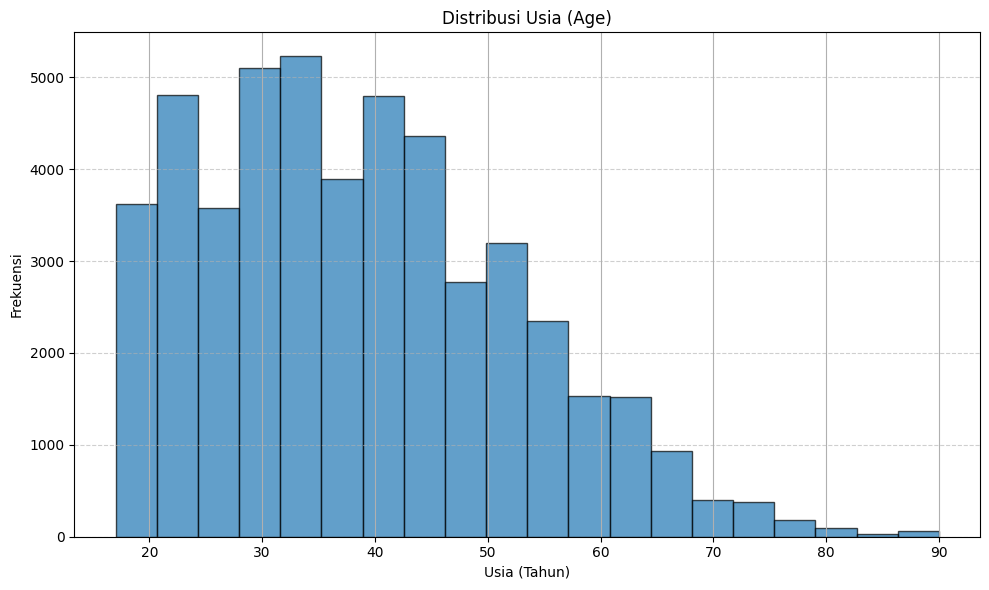

In [34]:
# Jawab 1.1 - Histrogram

import pandas as pd
import matplotlib.pyplot as plt

# Membuat histogram untuk kolom 'age'
plt.figure(figsize=(10, 6))
df['age'].hist(bins=20, edgecolor='black', alpha=0.7)
plt.title('Distribusi Usia (Age)')
plt.xlabel('Usia (Tahun)')
plt.ylabel('Frekuensi')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.savefig('age_distribution_histogram.png')

print("Histogram untuk kolom 'age' ")

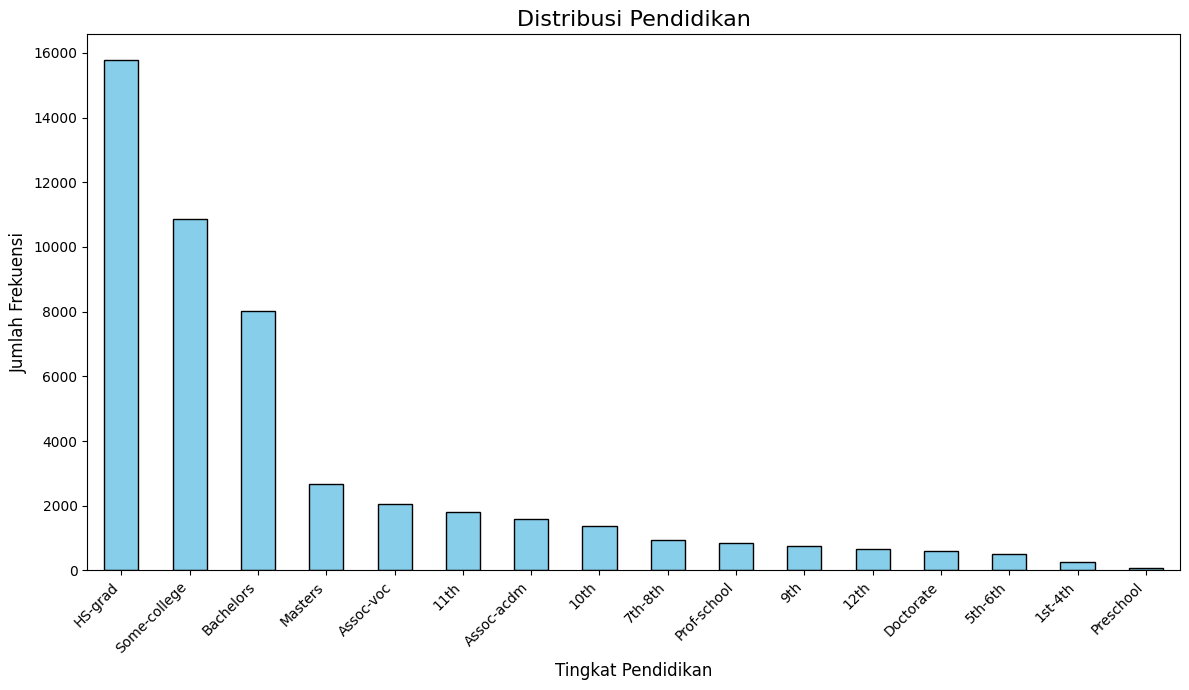

In [35]:
# Jawab 1.2 - Barchart

import pandas as pd
import matplotlib.pyplot as plt

# Menghitung frekuensi setiap kategori pendidikan
education_counts = df['education'].value_counts()

# Membuat barchart
plt.figure(figsize=(12, 7)) # Mengatur ukuran gambar agar lebih mudah dibaca
education_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Distribusi Pendidikan', fontsize=16)
plt.xlabel('Tingkat Pendidikan', fontsize=12)
plt.ylabel('Jumlah Frekuensi', fontsize=12)
plt.xticks(rotation=45, ha='right') # Memutar label sumbu x agar tidak tumpang tindih
plt.tight_layout() # Menyesuaikan tata letak agar semua elemen terlihat
plt.show()

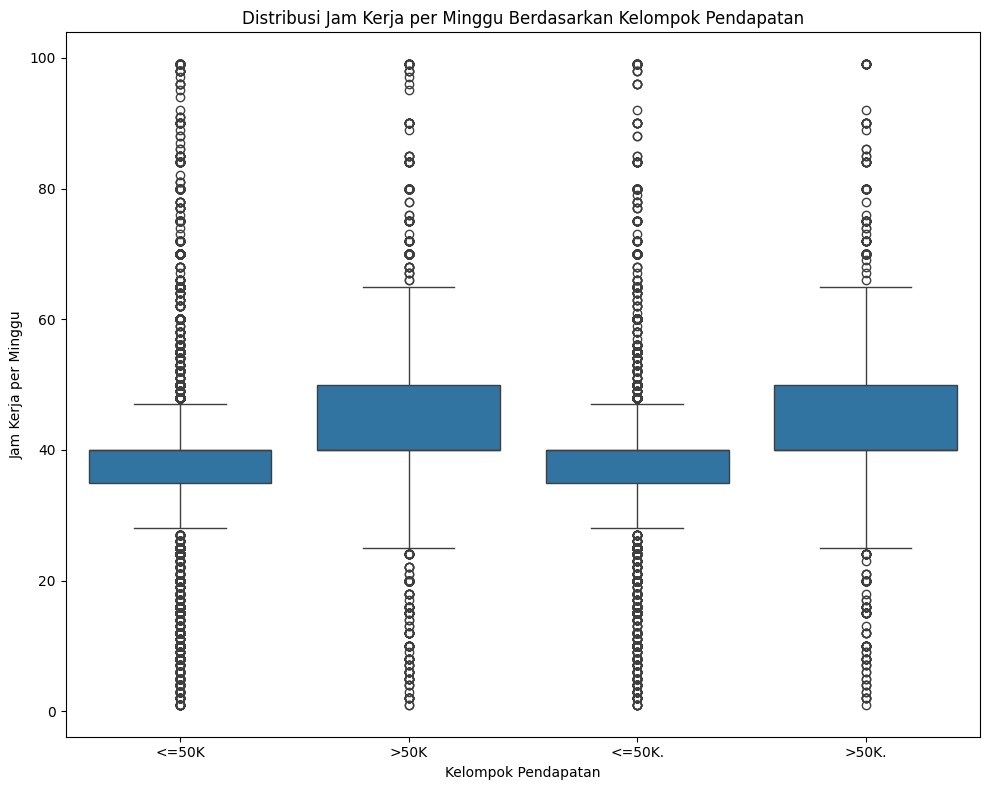

In [36]:
# Jawab 1.3 - Boxplot

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Membuat boxplot
plt.figure(figsize=(10, 8))
sns.boxplot(x='income', y='hours-per-week', data=df)
plt.title('Distribusi Jam Kerja per Minggu Berdasarkan Kelompok Pendapatan')
plt.xlabel('Kelompok Pendapatan')
plt.ylabel('Jam Kerja per Minggu')
plt.tight_layout()
plt.savefig('income_hours_boxplot.png')

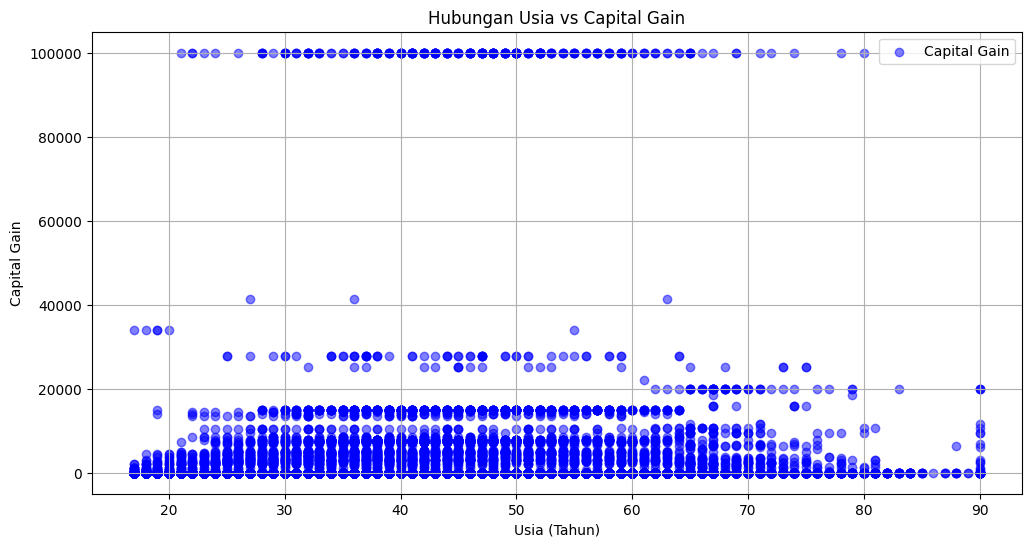

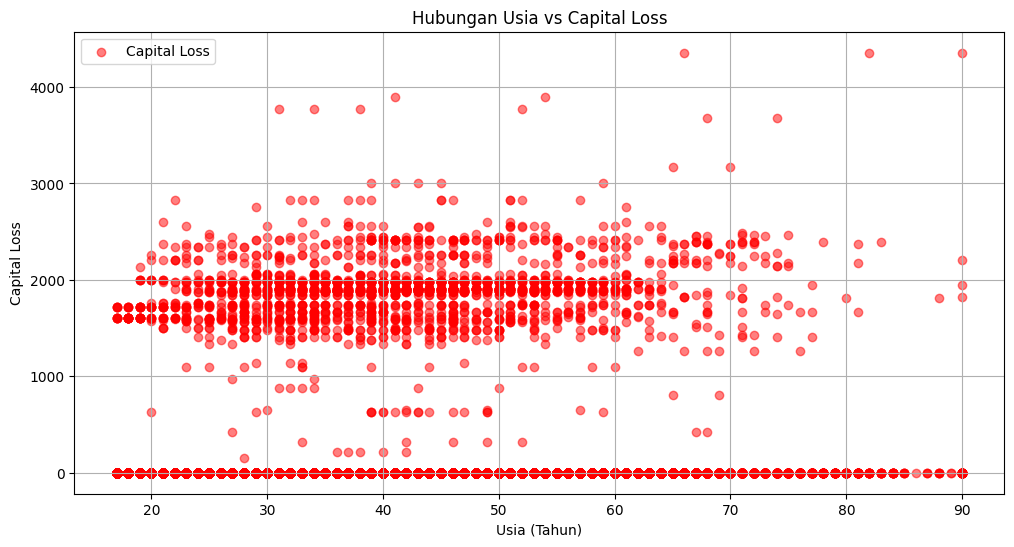

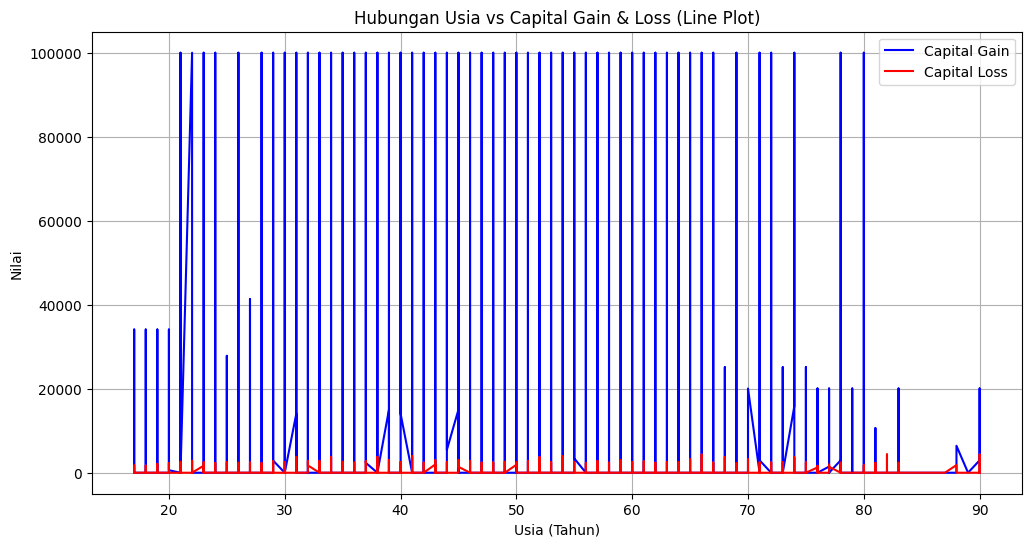

In [37]:
# Jawab 1.4 - Lineplot

import pandas as pd
import matplotlib.pyplot as plt

# Scatter plot untuk age vs capital-gain
plt.figure(figsize=(12, 6))
plt.scatter(df['age'], df['capital-gain'], alpha=0.5, label='Capital Gain', color='blue')
plt.title('Hubungan Usia vs Capital Gain')
plt.xlabel('Usia (Tahun)')
plt.ylabel('Capital Gain')
plt.legend()
plt.grid(True)
plt.show()

# Scatter plot untuk age vs capital-loss
plt.figure(figsize=(12, 6))
plt.scatter(df['age'], df['capital-loss'], alpha=0.5, label='Capital Loss', color='red')
plt.title('Hubungan Usia vs Capital Loss')
plt.xlabel('Usia (Tahun)')
plt.ylabel('Capital Loss')
plt.legend()
plt.grid(True)
plt.show()

# Data perlu diurutkan berdasarkan 'age' terlebih dahulu untuk membuat plot lebih baik
df_sorted = df.sort_values('age')

plt.figure(figsize=(12, 6))
plt.plot(df_sorted['age'], df_sorted['capital-gain'], label='Capital Gain', color='blue')
plt.plot(df_sorted['age'], df_sorted['capital-loss'], label='Capital Loss', color='red')
plt.title('Hubungan Usia vs Capital Gain & Loss (Line Plot)')
plt.xlabel('Usia (Tahun)')
plt.ylabel('Nilai')
plt.legend()
plt.grid(True)
plt.show()

## Soal 2 - Analisis Visual (15 poin)
1. Fenomena apa yang terjadi pada distribusi data 'age'?
2. Jika terdapat data yang hilang pada variabel 'age', strategi apa yang Anda terapkan? Mengapa?
3. Berapa jumlah outlier pada setiap kategori 'income' berkaitan dengan 'hour-per-week'? Kategori apa yang paling banyak memiliki outlier?

In [45]:
# Jawab dengan komentar python

'''
1. Berdasarkan histogram "Distribusi Usia (Age)", terlihat bahwa data condong ke kanan (right-skewed).
Mayoritas individu berada pada usia muda, terutama 20–30 tahun, lalu jumlahnya menurun seiring bertambahnya usia.
Frekuensi usia lanjut (60–90 tahun) jauh lebih sedikit dan cenderung menjadi outlier. Pola ini umum pada
data demografi atau tenaga kerja, di mana kelompok usia produktif lebih dominan.

2. Jika terdapat data hilang pada variabel `age`, strategi yang digunakan adalah imputasi median.
Alasan:
  - Median lebih tahan terhadap outlier (misalnya usia sangat tua), sehingga hasil imputasi lebih representatif.
  - Median lebih baik menjaga distribusi data yang condong ke kanan (right-skewed) dibandingkan mean.

3. Berdasarkan boxplot, terdapat banyak *outlier* pada variabel `hours-per-week` untuk setiap kategori `income`.
  - `<=50K`: Outlier sangat banyak, baik di jam kerja rendah (<20) maupun tinggi (>60).
  - `>50K`: Juga banyak outlier, terutama pada jam kerja tinggi.
  Secara visual, kategori `>50K` tampak memiliki sedikit lebih banyak outlier pada jam kerja tinggi.
  Namun, jumlah pastinya tidak bisa dihitung hanya dari gambar.
'''




'\n1. Berdasarkan histogram "Distribusi Usia (Age)", terlihat bahwa data condong ke kanan (right-skewed).\nMayoritas individu berada pada usia muda, terutama 20–30 tahun, lalu jumlahnya menurun seiring bertambahnya usia.\nFrekuensi usia lanjut (60–90 tahun) jauh lebih sedikit dan cenderung menjadi outlier. Pola ini umum pada\ndata demografi atau tenaga kerja, di mana kelompok usia produktif lebih dominan.\n\n2. Jika terdapat data hilang pada variabel `age`, strategi yang digunakan adalah imputasi median.\nAlasan:\n  - Median lebih tahan terhadap outlier (misalnya usia sangat tua), sehingga hasil imputasi lebih representatif.\n  - Median lebih baik menjaga distribusi data yang condong ke kanan (right-skewed) dibandingkan mean.\n\n3. Berdasarkan boxplot, terdapat banyak *outlier* pada variabel `hours-per-week` untuk setiap kategori `income`.\n  - `<=50K`: Outlier sangat banyak, baik di jam kerja rendah (<20) maupun tinggi (>60).\n  - `>50K`: Juga banyak outlier, terutama pada jam kerja t

# Bagian 3 - Encoding Variabel Kategorical

## Soal 1 (5 poin)
Lakukan encoding pada 'Sex' dan 'Income'. 'Income' merupakan variabel target

In [49]:
# Jawab Soal 1
# Kerjakan pada cell ini
# Anda diperbolehkan menambah cell jika diperlukan

import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Jika 'income' memiliki spasi, bersihkan terlebih dahulu
df['income'] = df['income'].str.strip()

# Inisialisasi LabelEncoder
le = LabelEncoder()

# encoding pada kolom 'sex'
df['sex_encoded'] = le.fit_transform(df['sex'])

# encoding pada kolom 'Income'
df['income_encoded'] = le.fit_transform(df['income'])

print("Dataframe setelah encoding:")
print(df[['sex', 'sex_encoded', 'income', 'income_encoded']].head())

Dataframe setelah encoding:
      sex  sex_encoded income  income_encoded
0    Male            1  <=50K               0
1    Male            1  <=50K               0
2    Male            1  <=50K               0
3    Male            1  <=50K               0
4  Female            0  <=50K               0


# Bagian 4 - Analisis Korelasi

## Soal 1 (10 poin)
1. Lakukan analisis korelasi pada variabel 'age', 'education-num', 'hours-per-week', 'capital-gain', 'capital-loss', dan 'income' (yang sudah di-encoding)
2. Berdasarkan hasil korelasi, informasi apa yang dapat Anda interpretasikan?

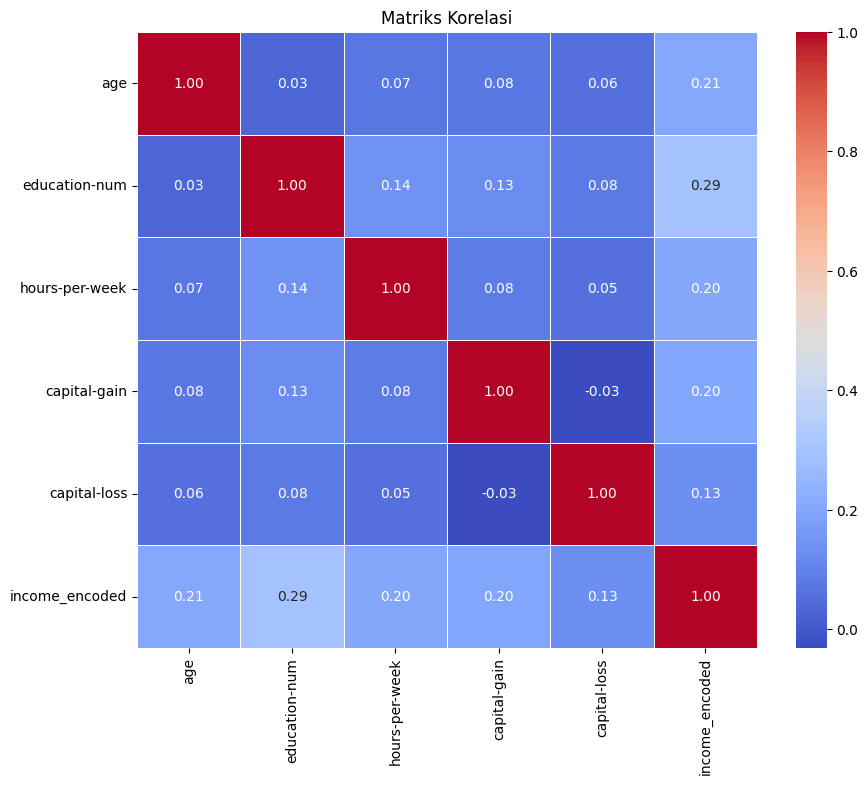

In [50]:
# Jawab Soal 1
# Kerjakan pada cell ini
# Anda diperbolehkan menambah cell jika diperlukan

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# input variabel numerik yang akan dianalisis
kolom_korelasi = [
    'age',
    'education-num',
    'hours-per-week',
    'capital-gain',
    'capital-loss',
    'income_encoded'
]

# Hitung matriks korelasi
matriks_korelasi = df[kolom_korelasi].corr()

# matriks korelasi dalam bentuk heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(matriks_korelasi, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matriks Korelasi')
plt.show()

In [51]:
# Hasil analisis jelaskan pada cell ini

'''
Dari heatmap korelasi, variabel dengan hubungan terkuat terhadap `income_encoded` adalah:

- `education-num` (0.29): prediktor terbaik, semakin tinggi pendidikan semakin tinggi pendapatan.
- `age` (0.21), `hours-per-week` (0.20), dan `capital-gain` (0.20): korelasi positif moderat.
- `capital-loss` (0.13): korelasi paling lemah.

Antar prediktor:
- `education-num` dan `age` memiliki korelasi moderat (0.13).
- `capital-gain` dan `capital-loss` hampir tidak berkorelasi (-0.03).
- Umumnya antar variabel rendah (<0.20), sehingga risiko multikolinearitas kecil.

Kesimpulan: `education-num` adalah variabel paling berpengaruh untuk memprediksi pendapatan.
'''


'\nDari heatmap korelasi, variabel dengan hubungan terkuat terhadap `income_encoded` adalah:\n\n- `education-num` (0.29): prediktor terbaik, semakin tinggi pendidikan semakin tinggi pendapatan.\n- `age` (0.21), `hours-per-week` (0.20), dan `capital-gain` (0.20): korelasi positif moderat.\n- `capital-loss` (0.13): korelasi paling lemah.\n\nAntar prediktor:\n- `education-num` dan `age` memiliki korelasi moderat (0.13).\n- `capital-gain` dan `capital-loss` hampir tidak berkorelasi (-0.03).\n- Umumnya antar variabel rendah (<0.20), sehingga risiko multikolinearitas kecil.\n\nKesimpulan: `education-num` adalah variabel paling berpengaruh untuk memprediksi pendapatan.\n'

# Bagian 5 - Pra Pengolahan Data Pada Dataset MNIST

Pada bagian ini, Anda diminta untuk melakukan proses EDA dan pra pengolahan data sederhana pada dataset MNIST. Dataset MNIST merupakan data citra tulisan tangan untuk digil 0 hingga 9. Sebelum melakukan proses pengolahan, Anda akan dibantu dengan proses loading data dan inspeksi data.

Hints:
1. Hanya gunakan data **Test**
2. Anda perlu melakukan pengolahan terhadap semua data test (total 10k data). Anda dapat menggunakan function untuk mempermudah pekerjaan.

In [52]:
# Fetch data and inspect data shape
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

# Load train & test split
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Train shape: (60000, 28, 28)
Test shape: (10000, 28, 28)


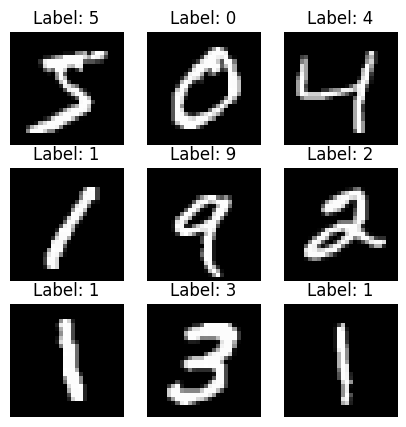

In [53]:
# Inspeksi Visual
plt.figure(figsize=(5,5))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(X_train[i], cmap="gray")
    plt.title(f"Label: {y_train[i]}")
    plt.axis("off")
plt.show()

## Soal 1 (10 poin)
1. Lakukan proses **upsampling** citra menjadi ukuran 32x32
2. Tampilakan 5 data hasil proses **upsampling**

Hint: Anda harus membuat array kosong untuk menampung hasil upsampling. Replace pada array X_test tidak dapat dilakukan karena data disimpan dalam bentuk ndarray yang memiliki ukuran fix (10000, (28,28))

In [54]:
# Jawab Soal 1
# Kerjakan pada cell ini
# Anda diperbolehkan menambah cell jika diperlukan


import numpy as np
import scipy.ndimage as ndi

# Asumsikan X_test sudah dimuat dan memiliki shape (10000, 28, 28)

# 1. Buat array kosong untuk menampung hasil upsampling
# Gunakan np.float32 untuk menyimpan nilai piksel yang telah diinterpolasi
X_test_upsampled = np.zeros((10000, 32, 32), dtype=np.float32)

# 2. Lakukan iterasi dan upsampling pada setiap citra
for i in range(X_test.shape[0]):
    # Hitung faktor zoom
    zoom_factor = 32 / 28

    # Lakukan upsampling menggunakan scipy.ndimage.zoom
    X_test_upsampled[i] = ndi.zoom(X_test[i], zoom_factor, order=1)

# 3. Lakukan normalisasi pada hasil upsampling
# Normalisasi ke rentang [0, 1] jika data asli dalam rentang [0, 255]
# Pastikan data asli X_test sudah dalam tipe data float
X_test_upsampled = X_test_upsampled / 255.0

# 4. Verifikasi shape dari array yang baru
print("Shape array X_test_upsampled:")
print(X_test_upsampled.shape)

Shape array X_test_upsampled:
(10000, 32, 32)


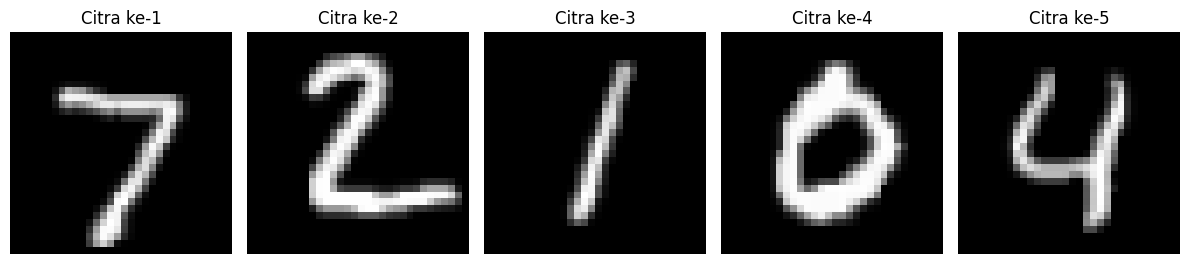

Proses upsampling selesai. menampilkan 5 citra.


In [56]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.ndimage as ndi


# Langkah 1. Buat array kosong untuk menampung hasil upsampling
# Gunakan np.float32 untuk menyimpan nilai piksel yang telah diinterpolasi
X_test_upsampled = np.zeros((X_test.shape[0], 32, 32), dtype=np.float32)

# Langkah 2. Lakukan iterasi dan upsampling pada setiap citra
for i in range(X_test.shape[0]):
    # Hitung faktor zoom
    zoom_factor = 32 / 28

    # Lakukan upsampling menggunakan scipy.ndimage.zoom
    X_test_upsampled[i] = ndi.zoom(X_test[i], zoom_factor, order=1)

# Langkah 3. Lakukan normalisasi pada hasil upsampling
# Normalisasi ke rentang [0, 1] jika data asli dalam rentang [0, 255]
X_test_upsampled = X_test_upsampled / 255.0

# Langkah 4. Tampilkan 5 citra pertama dari hasil upsampling
plt.figure(figsize=(12, 6))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(X_test_upsampled[i], cmap='gray')
    plt.title(f'Citra ke-{i+1}')
    plt.axis('off')

plt.tight_layout()
plt.show()

print("Proses upsampling selesai. menampilkan 5 citra.")

## Soal 2 (10 poin)
Lakukan normalisasi nilai citra tiap piksel menjadi rentang 0-1

In [58]:
# Jawab Soal 2
# Kerjakan pada cell ini
# Anda diperbolehkan menambah cell jika diperlukan

import numpy as np

# Lakukan normalisasi
X_test_normalized = X_test_upsampled / 255.0

# Cek rentang nilai setelah normalisasi
print(f"Nilai piksel minimum setelah normalisasi: {np.min(X_test_normalized)}")
print(f"Nilai piksel maksimum setelah normalisasi: {np.max(X_test_normalized)}")

# Cek tipe data
print(f"Tipe data setelah normalisasi: {X_test_normalized.dtype}")

Nilai piksel minimum setelah normalisasi: 0.0
Nilai piksel maksimum setelah normalisasi: 0.003921568859368563
Tipe data setelah normalisasi: float32


## Soal 3 (10 poin)
Ubah metriks citra menjadi array 1 dimensi. Lakukan pada semua data test yang sudah di resize dan normalisasi.

Hint: Anda harus membuat holder array kosong untuk menampung hasilnya.

In [59]:
# Jawab Soal 3
# Kerjakan pada cell ini
# Anda diperbolehkan menambah cell jika diperlukan

import numpy as np

# menentukan shape baru untuk array 1D
jumlah_citra = X_test_normalized.shape[0]
dimensi_baru = 32 * 32
shape_baru = (jumlah_citra, dimensi_baru)

# melakukan flattening pada array
X_test_flattened = X_test_normalized.reshape(shape_baru)

# buat shape dari array yang baru
print("Shape array X_test_flattened:")
print(X_test_flattened.shape)

Shape array X_test_flattened:
(10000, 1024)
